In [3]:
# I wanted to create an example graphic to demonstrate the concept of cosine similarity
options(scipen=999)
shhh <- suppressPackageStartupMessages
shhh(library(dplyr))
shhh(library(ggplot2))
shhh(library(text2vec))
shhh(library(Matrix))

In [4]:
# Plot the following points
points1 <- c(0.025, 0.075, 0.070)
points2 <- c(0.07, 0.0725, 0.020)

df <- data.frame(points1, points2)

df

points1,points2
0.025,0.0700
0.075,0.0725
0.070,0.0200


In [7]:
# Create the cosine arc
arc_fun <- function(pt1, pt2, n.angle = 100, rad = .03) {
  a1 = atan2(pt1[2], pt1[1])
  a2 = atan2(pt2[2], pt2[1])
  n.angle = 100
  angles <- seq(a1,a2,len=n.angle)
  xc = 0
  yc = 0
  xs <- xc+rad*cos(angles)
  ys <- yc+rad*sin(angles)
  return(data.frame(x = xs, y = ys))
}

arc_df <- arc_fun(as.numeric(df[1,]), as.numeric(df[3,]))

arc_df2 <- arc_fun(as.numeric(df[2,]), as.numeric(df[3,]), rad = .02)

arc_df3 <- arc_fun(as.numeric(df[1,]), as.numeric(df[2,]), rad = .05)

In [9]:
# Compute the cosine distance between each point
m <- cbind(points1, points2) %>%
  Matrix(sparse = TRUE)

dist <- dist2(m, method = "cosine")
dist

WARN [2019-09-12 23:47:27] Sparsity will be lost - worth to calculate similarity instead of distance.


3 x 3 Matrix of class "dgeMatrix"
                          [,1]      [,2]      [,3]
[1,] -0.0000000000000002220446 0.1036466 0.4178881
[2,]  0.1036466020302929669228 0.0000000 0.1177382
[3,]  0.4178880996814751114243 0.1177382 0.0000000

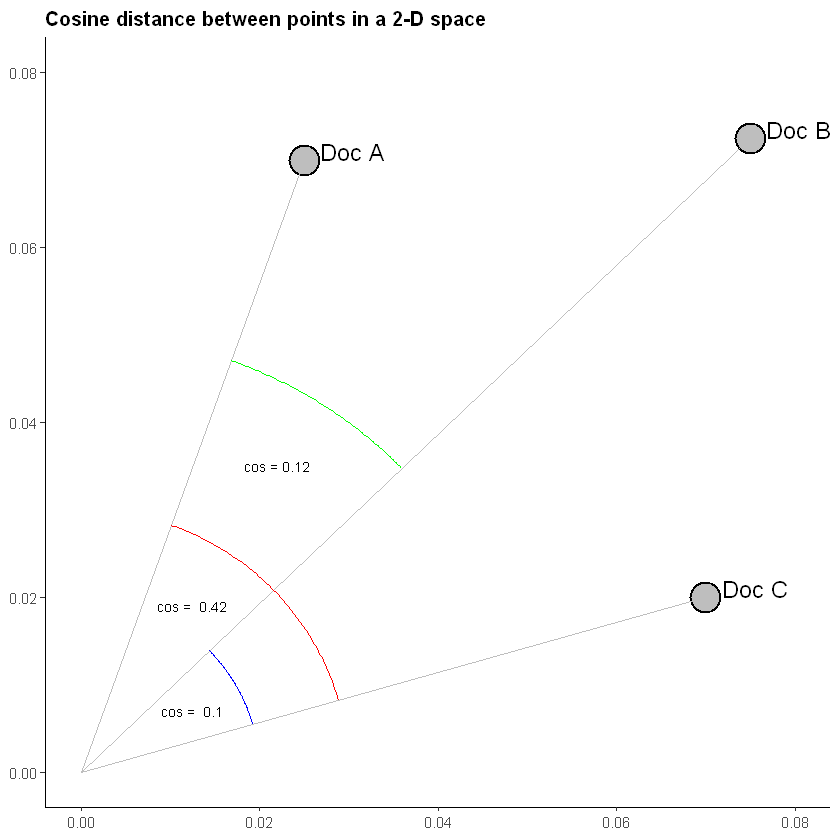

In [16]:
# Plot the results

df %>%
  ggplot(aes(x = points1, y = points2)) + 
  geom_point(shape = 21, colour = "black", fill = "grey", size = 8, stroke = 1) +
  scale_x_continuous(limits = c(0.000, 0.08)) +
  scale_y_continuous(limits = c(0.000, 0.08)) +
  geom_segment(aes(xend=points1, yend = points2), x = 0, y = 0, color = "grey") +
  geom_line(data = arc_df, aes(x, y), color = 'red') +
  geom_line(data = arc_df2, aes(x, y), color = 'blue') +
  geom_line(data = arc_df3, aes(x, y), color = 'green') +
  ggtitle("Cosine distance between points in a 2-D space") +
  theme_bw() +
  theme(plot.title = element_text(size = 12, face = "bold"),
    #axis.text.x = element_blank(), axis.text.y = element_blank(),
    axis.title.x = element_blank(), axis.title.y = element_blank(),
    panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
  geom_text(aes(label = c("Doc A", "Doc B", "Doc C"), hjust = -0.25, vjust = 0), size = 5) +
  annotate("text", x = 0.022, y = 0.035, label = paste0("cos = ", round(dist[2, 3], 2)), size = 3) +
  annotate("text", x = 0.0125, y = 0.019, label = paste("cos = ", round(dist[3, 1], 2)), size = 3) +
  annotate("text", x = 0.0125, y = 0.007, label = paste("cos = ", round(dist[1, 2], 2)), size = 3)